# MATH 210 Lab Quiz 2 L2A

## Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import scipy.linalg as la
%matplotlib inline

**Question 1(a)**

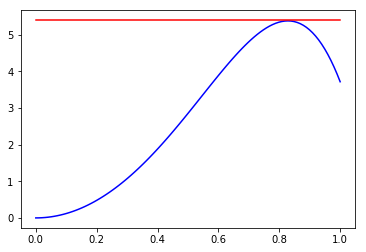

In [2]:
x = np.linspace(0,1,100)
y = -4*x**4 * np.sin(x**2) + 10*x**2 * np.cos(x**2) + 2 * np.sin(x**2)
plt.plot(x,y,'b',[0,1],[5.4,5.4],'r');

**Question 1(b)**

In [3]:
def f_int(abs_tolerance):
    '''Compute an approximation of \int_0^1 x^2 \sin(x^2) dx using the trapezoid rule.
    
    Parameters
    ----------
    abs_tolerance : number, the approximation is within abs_tolerance of the true value of the integral
    
    Returns
    -------
    An approximation of the integral \int_0^1 x^2 \sin(x^2) dx using the trapezoid rule. The second
    derivative of x^2 \sin(x^2) is bounded by 5.4 on the interval [0,1]. Therefore we choose
    N = int(np.sqrt(M/(12*abs_tolerance)))+1 subintervals of [0,1] to guarantee the error is less
    than abs_tolerance.
    '''
    M = 5.5
    N = int(np.sqrt(M/(12*abs_tolerance)))+1
    x = np.linspace(0,1,N+1)
    y = x**2 * np.sin(x**2)
    I = spi.trapz(y,x)
    return I

**Question 2**

In [4]:
def numeric_diff(y):
    '''Compute the numeric derivative of an array.
    
    Parameters
    ----------
    y : 1D NumPy array
    
    Returns
    -------
    1D NumPy array d of the same length as y (len(y) = N+1). Entries (away from endpoints) are
    given by the difference formula: d[k] = (y[k+1] - y[k-1])/2. Endpoints are backwards/forwards
    difference formulas: d[0] = y[1] - y[0], d[N] = y[N] - y[N-1]
    '''
    N = len(y) - 1
    D = (y[2:] - y[:-2])/2
    D0 = y[1] - y[0]
    DN = y[N] - y[N-1]
    D = np.hstack([[D0],D,[DN]])
    return D

**Question 3**

In [5]:
def pq_integral(p,q,b,N):
    '''Approximate the integral of exp(-p*x**2)/(1 + q**2*x**2) from 0 to b using Simpsons rule.
    
    Parameters
    ----------
    p,q : numbers, parameters in the integrand
    b : number, upper limit of integration
    N : integer, 2N subintervals are used in Simpsons rule
    Returns
    -------
    Approximation of the integral exp(-p*x**2)/(1 + q**2*x**2) from 0 to b using Simpsons rule
    with 2N subintervals.
    '''
    x = np.linspace(0,b,2*N+1)
    y = np.exp(-p*x**2)/(1 + q**2*x**2)
    I = spi.simps(y,x)
    return I

**Question 4**

In [6]:
def max_eigval(A):
    '''Compute the maximum eigenvalue of (A + A^T)^2.'''
    if A.ndim != 2:
        print('Matrix A must be square')
        return None
    nrows, ncols = A.shape
    if nrows != ncols:
        print('Matrix A must be square')
        return None
    S = (A + A.T) @ (A + A.T)
    evals, evecs = la.eig(S)
    evals = evals.real
    return np.max(evals)

**Question 5**

In [7]:
def solve_D(n,b):
    '''Solve the system (Dn^2 - In)x = b where Dn is the matrix n + 1 square matrix
    
    Dn[0,0] = −2
    Dn[0,1] = 2
    Dn[i,i+1] = 1, for i=1,...,n−1
    Dn[i+1,i] = −1, for i=0,...,n−2
    Dn[n,n−1] = −2
    Dn[n,n] = 2
    
    Parameters
    ----------
    n : integer, the matrix Dn is square of size n+1
    b : 2D NumPy array of size 1 by n+1, the right side of the system (Dn^2 - In)x = b
    
    Returns
    -------
    Solution of the system (Dn^2 - In)x = b as a 2D NumPy array.
    '''
    D = np.zeros((n+1,n+1))
    D[0,0] = -2
    D[0,1] = 2
    D[n,n-1] = -2
    D[n,n] = 2
    for i in range(1,n):
        D[i,i+1] = 1
    for j in range(0,n-1):
        D[j+1,j] = -1
    I = np.eye(n+1)
    x = la.solve(D @ D - I,b)
    return x